In [1]:
#Motivation: Due to the continuous use of pesticides in agriculture, appreciable
#quantities of pesticides and their degraded products may accumulate in the ecosystem
#leading to serious problem to man and the environment. Therefore, it is essential to
#study the residue and degradation pattern of pesticides in crops, soils and water
#systematically in order to generate meaningful data from the point of view of plant
#protection, public health and environmental safety. 


#This project has the purpose of modelling the degradation of the pesticide in the soil.
#We use a two compartments model (crop and surrounding soil) and construct linear system 
#to study the transference of some amount of pesticide from the soil to the crop, from the 
#crop to the soil, besides the degradation of the pesticide in the soil.

#Remark: Pesticide degradation is the process by which a pesticide is transformed into a 
#benign substance that is environmentally compatible with the site to which it was applied.


In [2]:
import math   # This will import math module
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
%%latex
Consider a system of two equations with unknowns $x=x(t)$ and $y=y(t)$:
    
    \[\dfrac{dx}{dt}=-\beta x+\alpha y\]
    \[\dfrac{dy}{dt}=\beta x-(\alpha+\gamma) y\]

The function $x$ represents the amount of pesticide (mass per volume) in the crop, and $y$ the amount in the soil.
Note that $x$ and $y$ are non-negative functions.


<IPython.core.display.Latex object>

In [4]:
%%latex
$\alpha y =$ rate that pesticide is taken up by the plants ($\alpha >0 $).

<IPython.core.display.Latex object>

In [5]:
%%latex
$\beta x =$ rate that the pesticide is transfered back to the soil ($\beta >0 $).

<IPython.core.display.Latex object>

In [6]:
%%latex
$\gamma y =$ rate of natural degradation of the pesticide in the soil ($\gamma >0 $).

<IPython.core.display.Latex object>

In [8]:
%%latex
Assume that $\alpha=0.35$ (per day), $\beta=0.15$ (per day) and $\gamma=0.13$ (per day)

<IPython.core.display.Latex object>

In [7]:
alpha = 0.35 #per day
beta=0.15 #per day
gamma=0.13 #per day

In [9]:
x_0 = input("Enter the initial amount of pesticide (mass per volume) in the crop: ")
x_0=float(x_0)

y_0 = input("Enter the initial amount of pesticide (mass per volume) in the soil: ")
y_0=float(y_0)

harvesting = input("Enter the amount of time (in days) that you want to study the crop: ")
harvesting = int(harvesting)

Enter the initial amount of pesticide (mass per volume) in the crop: 45
Enter the initial amount of pesticide (mass per volume) in the soil: 135
Enter the amount of time (in days) that you want to study the crop: 10


In [10]:
Soil=[] #stores the amount of pesticide in the soil
Crop=[] #stores the amount of pesticide in the crop
Day=[]
state= np.array([x_0, y_0]) #define the initial state of the system
A= np.array([[-beta, alpha], [beta, -(alpha+gamma)]]) #system's matrix


#computing the evolution of the system along the interval of days: [0,harvesting]

for i in range(harvesting):
    #Recording the states of the system 
    Crop.append(state[0]) 
    Soil.append(state[1])
    Day.append(i)
    #Computing the new state of the system 
    C = np.dot(A,state)
    state=C
    if state[0]<0:
        state[0]=0
    if state[1]<0:
        state[1]=0
    

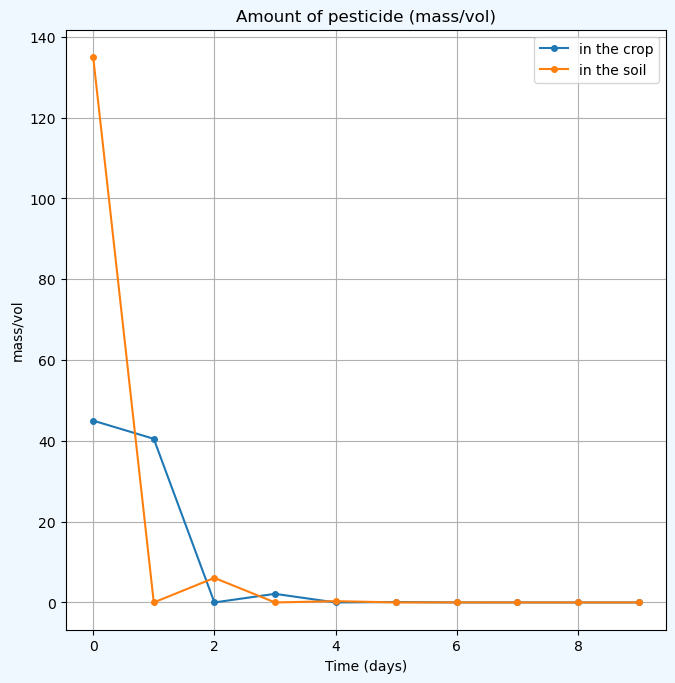

In [11]:
#Plotting the day x Crop / Soil:
fig = plt.figure(figsize=(6,6), dpi=100, facecolor = 'aliceblue')
ax = fig.add_axes([0,0,1,1])

ax.plot(Day, Crop, label='in the crop',marker='o', markersize=4)
#plt.text(x=Day, y=Crop, s=Crop)


ax.plot(Day, Soil, label='in the soil',marker='o', markersize=4)

ax.legend()
plt.xlabel('Time (days)')
plt.ylabel('mass/vol')
plt.title('Amount of pesticide (mass/vol)')
plt.grid()


In [12]:
#Imagine that some control mechanism was implemented in the system crop x soil.
#The mechanism reads the data and introduces (if necessary) a certain amount of 
#pesticide in the soil when the level of pesticide in the soil of the previous day is 
#less or equal to some value z. In this case, we have that the soil and crop absorbtion 
#of the pesticide works as in the graph below.


z = input("Enter the minimun amount of pesticide you want to keep in the soil: ")
z = float(z)
h = input("Enter the amount of pesticide you want to add into the soil: ")
h = float(h)


Enter the minimun amount of pesticide you want to keep in the soil: 5
Enter the amount of pesticide you want to add into the soil: 5


In [13]:
Soil=[] #stores the amount of pesticide in the soil
Crop=[] #stores the amount of pesticide in the crop
Day=[]
state= np.array([x_0, y_0]) #define the initial state of the system
A= np.array([[-beta, alpha], [beta, -(alpha+gamma)]]) #system's matrix


#computing the evolution of the system along the interval of days: [0,harvesting]
for i in range(harvesting):
    #Recording the states of the system 
    Crop.append(state[0]) 
    Soil.append(state[1])
    Day.append(i)
    
    #Computing the new state of the system : after one day  
    C = np.dot(A,state)
    state=C
    if state[0]<0:
        state[0]=0
    if state[1]<0:
        state[1]=0
    
    #Adding pesticide (if necessary)
    if state[1]<=z:
        state[1]=state[1]+h

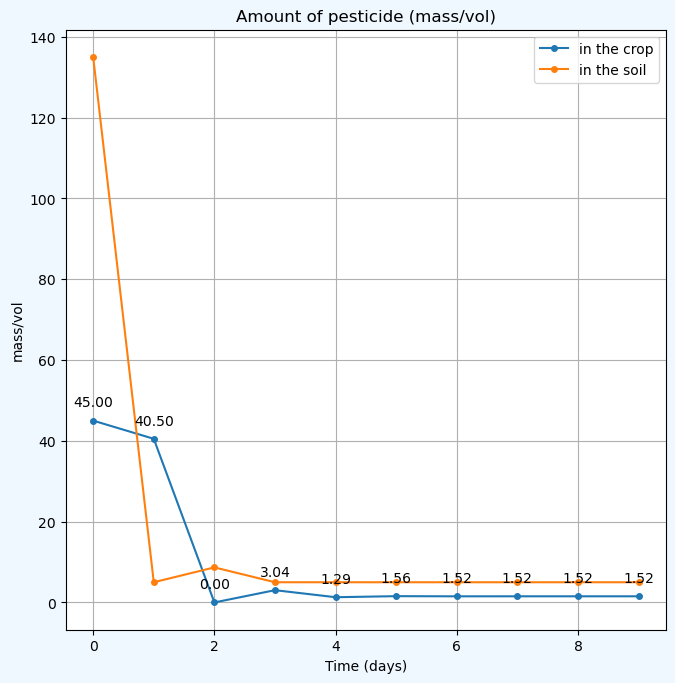

In [14]:
#Plotting the day x Crop / Soil:
fig = plt.figure(figsize=(6,6), dpi=100, facecolor = 'aliceblue')
ax = fig.add_axes([0,0,1,1])

ax.plot(Day, Crop, label='in the crop', marker='o', markersize=4)
# zip joins x and y coordinates in pairs

for x,y in zip(Day,Crop):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax.plot(Day, Soil, label='in the soil',marker='o', markersize=4)

ax.legend()
plt.xlabel('Time (days)')
plt.ylabel('mass/vol')
plt.title('Amount of pesticide (mass/vol)')
plt.grid()
